In [8]:
import os.path

import numpy as np

from notebooks.analytics.utils import init_analysis, savefig

In [9]:
#EXP_NAME = "daeclust_mnist_fmnist_01-balanced-clusters" # no popularity
#EXP_NAME = "daeclust_mnist_fmnist_02-balanced-clusters" # with popularity
#EXP_NAME = "daeclust_mnist_fmnist_03-balanced-clusters" #
#EXP_NAME = "daeclust_mnist_fmnist_04-balanced-clusters" # fixed std (2) using median
#EXP_NAME = "daeclust_mnist_fmnist_05-balanced-clusters" # fixed std, std tolerance 3
#EXP_NAME = "daeclust_mnist_fmnist_06-balanced-clusters" # fixed std, std tolerance 0
EXP_NAME = "daeclust_03-clusters" # multi clusters, tol: 2

df = init_analysis(EXP_NAME)

C:\Users\micdu\AppData\Local\Temp\ipykernel_11208\3474963952.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  loss_plot_fig.show()


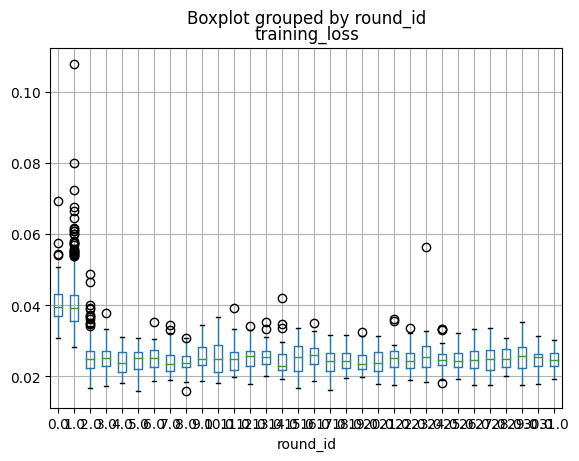

In [16]:
loss_plot_ax = df.loc[df.round_id < 32].boxplot("training_loss", by="round_id")
loss_plot_fig = loss_plot_ax.get_figure()
savefig(loss_plot_fig, "training_loss")
loss_plot_fig.show()

In [15]:
dataset_perf = df.loc[df.round_id < 32].groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       fmnist     0.038316
          mnist      0.041528
1.0       fmnist     0.036924
          mnist      0.040648
2.0       fmnist     0.025647
                       ...   
29.0      mnist      0.021832
30.0      fmnist     0.025766
          mnist      0.022010
31.0      fmnist     0.024911
          mnist      0.021872
Name: validation_loss, Length: 64, dtype: float64

C:\Users\micdu\AppData\Local\Temp\ipykernel_11208\1895144522.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


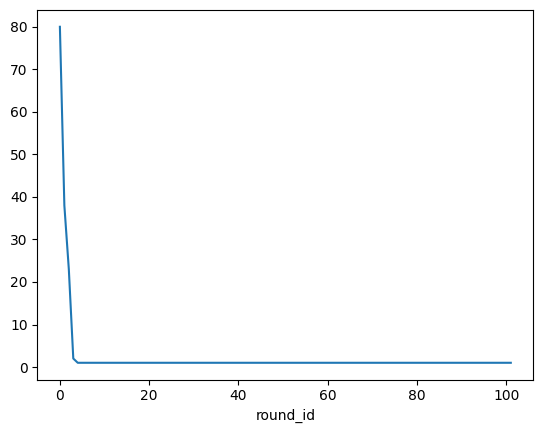

In [12]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [13]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[1.        , 0.90720075],
       [0.90720075, 1.        ]])

In [14]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[1.        , 0.85382919],
       [0.85382919, 1.        ]])